In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

We have real quantum hardware and simulators. For these demonstration purposes, we go for simulators because: <br>
1. We will have complete wave function of the system (as opposed to in real systems where the wavefunction is very ikely to collapse) i.e. we are gonna have more information
2. We don't have noise at all (hence we have complete access to the wave function)

In [2]:
# The most commonly used quantum device in Pennylane is the "default.qubit" (which is the statevector simulator)
device = qml.device('default.qubit', wires=1)

In [3]:
@qml.qnode(device)
def circuit():
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)    # return the probabilites of the state of that given qubit

In [4]:
print(circuit())

[0.5 0.5]


In [42]:
qml.draw(circuit)()

'0: ──H─┤  Probs'

(<Figure size 288x144 with 1 Axes>, <Axes:>)

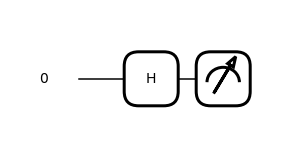

In [43]:
qml.draw_mpl(circuit)()

The 'default.qubit' backend simulator (the statevector sim) is based on Python. But, we know that Python is not the fastest of programming languages.
So, we use another simulator backend called "lightning.qubit" which is based on C++.

In [5]:
device1 = qml.device("lightning.qubit", wires=2)

In [35]:
@qml.qnode(device1)
def entanglement_circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.probs(wires=0)

In [36]:
print(entanglement_circuit())

[0.5 0.5]


(<Figure size 360x216 with 1 Axes>, <Axes:>)

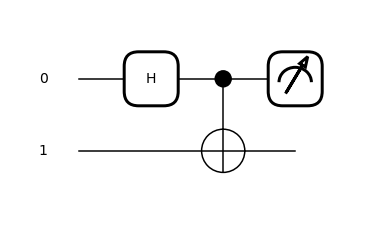

In [44]:
qml.draw_mpl(entanglement_circuit)()

We may also use the backend "default.mixed" to work on the mixed states (states with different probablities)

In [37]:
device2 = qml.device("default.mixed", wires=1)

In [38]:
@qml.qnode(device2)
def circuit2(theta):
    qml.RX(theta, wires=0)
    return qml.probs(wires=0)

In [39]:
print(circuit2(np.pi/6))

[0.9330127 0.0669873]


(<Figure size 288x144 with 1 Axes>, <Axes:>)

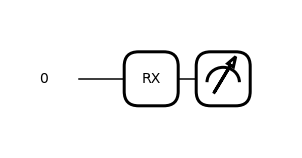

In [52]:
qml.draw_mpl(circuit2)(theta=np.pi/6)

In [53]:
qml.draw??

Another circuit

In [75]:
dev = qml.device("default.mixed", wires=3)

In [78]:
@qml.qnode(device=dev)
def circ(p):
    qml.Hadamard(wires=0)
    qml.BitFlip(p, wires=1)
    qml.CNOT(wires=[1,2])
    return qml.probs(wires=0), qml.probs(wires=1), qml.probs(wires=2)

In [79]:
prob = 0.3775

print(circ(prob))

[[0.5    0.5   ]
 [0.6225 0.3775]
 [0.6225 0.3775]]


(<Figure size 360x288 with 1 Axes>, <Axes:>)

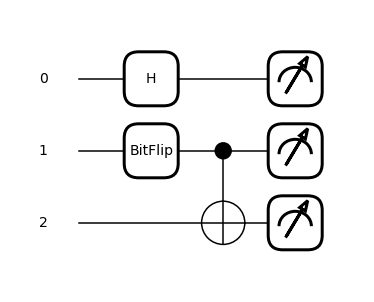

In [80]:
qml.draw_mpl(circ)(p=prob)

There is another kind of a quantum computer with a different unit of information.
This is the case of the quantum photonic computer where the basic unit of information is qnode (in a different way, different gates, different space, etc).
The backend for this is the "default.gaussian"

In [83]:
device3 = qml.device("default.gaussian", wires=2)

@qml.qnode(device=device3)
def circuit3(x, theta):
    qml.Displacement(x, 0, wires=0)
    qml.Beamsplitter(theta, 0, wires=[0, 1])
    return qml.expval(qml.NumberOperator(0))

print(circuit3(1,np.pi/3))

0.2500000000000001


(<Figure size 360x216 with 1 Axes>, <Axes:>)

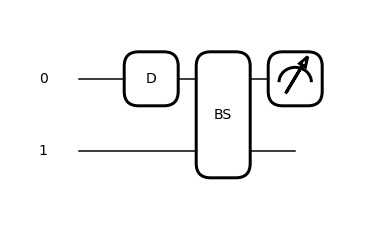

In [84]:
qml.draw_mpl(circuit3)(1, np.pi/4)

In [64]:
device4 = qml.device("default.qubit", wires=1)

In [65]:
@qml.qnode(device=device4)
def circuit4(theta):
    qml.RY(theta, wires=0)
    qml.Hadamard(0)
    return qml.probs(wires=0)

In [66]:
print(circuit4(theta=np.pi/4))

[0.85355339 0.14644661]


(<Figure size 360x144 with 1 Axes>, <Axes:>)

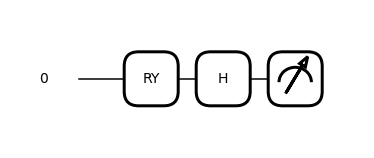

In [85]:
qml.draw_mpl(circuit4)(np.pi/2)